# Predicción del GRD

El objetivo es construir un modelo de aprendizaje automático capaz de predecir el GRD (Grupos Relacionados por el Diagnóstico) usando los registros disponibles en el dataset. 

In [ ]:
# Leer el dataset
import pandas as pd
dataset=pd.read_csv("dataset/dataset_elpino.csv",sep=";")

In [ ]:
# Información de las columnas del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Diag 01 Principal (cod+des)     14561 non-null  object
 1   Diag 02 Secundario (cod+des)    14561 non-null  object
 2   Diag 03 Secundario (cod+des)    14561 non-null  object
 3   Diag 04 Secundario (cod+des)    14561 non-null  object
 4   Diag 05 Secundario (cod+des)    14561 non-null  object
 5   Diag 06 Secundario (cod+des)    14561 non-null  object
 6   Diag 07 Secundario (cod+des)    14561 non-null  object
 7   Diag 08 Secundario (cod+des)    14561 non-null  object
 8   Diag 09 Secundario (cod+des)    14561 non-null  object
 9   Diag 10 Secundario (cod+des)    14561 non-null  object
 10  Diag 11 Secundario (cod+des)    14561 non-null  object
 11  Diag 12 Secundario (cod+des)    14561 non-null  object
 12  Diag 13 Secundario (cod+des)    14561 non-null

In [ ]:
# Cabeceras con primeros rows
dataset.head() 

,Diag 01 Principal (cod+des),Diag 02 Secundario (cod+des),Diag 03 Secundario (cod+des),Diag 04 Secundario (cod+des),Diag 05 Secundario (cod+des),Diag 06 Secundario (cod+des),Diag 07 Secundario (cod+des),Diag 08 Secundario (cod+des),Diag 09 Secundario (cod+des),Diag 10 Secundario (cod+des),...,Proced 24 Secundario (cod+des),Proced 25 Secundario (cod+des),Proced 26 Secundario (cod+des),Proced 27 Secundario (cod+des),Proced 28 Secundario (cod+des),Proced 29 Secundario (cod+des),Proced 30 Secundario (cod+des),Edad en años,Sexo (Desc),GRD
0,A41.8 - Otras septicemias especificadas,B37.6 - Endocarditis debida a candida (I39.8*),"I39.8 - Endocarditis, válvula no especificada,...",N10 - Nefritis tubulointersticial aguda,B96.1 - Klebsiella pneumoniae [K. pneumoniae] ...,L89.9 - Úlcera de decúbito y area de presión n...,L08.9 - Infección local de la piel y del tejid...,B96.2 - Escherichia coli [E. coli] como causa ...,A41.5 - Sepsis por otros organnismos Gram nega...,J86.9 - Piotórax sin fístula,...,99.84 - AISLAMIENTO,88.72 - ECOCARDIOGRAFIA,90.42 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTIVO,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,91.33 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,87.03 - TOMOGRAFIA AXIAL COMPUTERIZADA CABEZA,40,Hombre,184103 - MH SEPTICEMIA W/MCC
1,"U07.1 - COVID-19, virus identificado",J12.8 - Neumonía debida a otros virus,R06.0 - Disnea,R05 - Tos,"R50.9 - Fiebre, no especificada",Z29.0 - Aislamiento,Z01.7 - Examen de laboratorio,"J96.00 - Insuficiencia respiratoria aguda, Tip...",J94.2 - Hemotórax,J92.9 - Paquipleuritis sin asbestosis,...,91.62 - EXAMEN MICROSCOPICO PIEL.CULTIVO,90.43 - EXAMEN MICROSCOPICO RESPIRATORIO.CULTI...,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,96.59 - IRRIGACION HERIDA OTRA,90.99 - EXAMEN MICROSCOPICO DIGESTIVO INFERIOR...,53,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...
2,K56.5 - Adherencias [bridas] intestinales con ...,R57.2 - Shock séptico,R57.1 - Choque hipovolémico,J80 - Síndrome de dificultad respiratoria del ...,Y95 - Afección nosocomial,J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,B95.6 - Staphylococcus aureus como causa de en...,B96.8 - Otros agentes bacterianos especificado...,B37.1 - Candidiasis pulmonar,...,99.84 - AISLAMIENTO,91.73 - EXAMEN MICROSCOPICO HERIDA OPERATORIA....,90.53 - EXAMEN MICROSCOPICO SANGRE.CULTIVO Y S...,99.26 - INYECCION TRANQUILIZANTE,89.39 - OTRAS MEDICIONES Y EXAMENES NO QUIRURG...,89.66 - GASOMETRIA VENA,89.65 - GASOMETRIA ARTERIA,65,Hombre,041013 - PH ECMO VENTILACIÓN MECÁNICA PROLONGA...
3,K76.8 - Otras enfermedades especificadas del h...,K66.1 - Hemoperitoneo,"N18.5 - Enfermedad renal crónica, estadio 5",D64.9 - Anemia de tipo no especificado,E87.5 - Hiperpotasemia,E87.2 - Acidosis,J81 - Edema pulmonar,N17.8 - Otras insuficiencias renales agudas,J44.9 - Enfermedad pulmonar obstructiva crónic...,R41.0 - Desorientación no especificada,...,57.94 - SONDAJE URINARIO PERMANENTE,00.13 - INYECCION NESIRITIDE,00.17 - INFUSON AGENTE VASOPRESOR,99.04 - TRANSFUSION CONCENTRADO HEMATIES,99.18 - INYECCION ELECTROLITO,99.21 - INYECCION ANTIBIOTICO,99.23 - INYECCION ESTEROIDE,61,Hombre,041023 - PH VENTILACIÓN MECÁNICA PROLONGADA SI...
4,T81.0 - Hemorragia y hematoma que complican un...,"Y83.2 - Operación quirúrgica con anastomosis, ...",S31.1 - Herida de la pared abdominal,S36.80 - Traumatismo de otros órganos intraabd...,W31.62 - Contacto traumático con otras maquina...,"J96.09 - Insuficiencia respiratoria aguda, Tip...",J15.0 - Neumonía debida a Klebsiella pneumoniae,U82.2 - Resistencia a Betalactamasas de amplio...,"U07.1 - COVID-19, virus identificado","N39.0 - Infección de vías urinarias, sitio no ...",...,90.52 - EXAMEN MICROSCOPICO SANGRE.CULTIVO,91.39 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,91.32 - EXAMEN MICROSCOPICO URINARIO INFERIOR....,93.

In [32]:
# Dimensiones del dataset
dataset.shape

(14561, 68)

In [ ]:
# Valores nulos
dataset.isnull().sum()

Diag 01 Principal (cod+des)       0
Diag 02 Secundario (cod+des)      0
Diag 03 Secundario (cod+des)      0
Diag 04 Secundario (cod+des)      0
Diag 05 Secundario (cod+des)      0
                                 ..
Proced 29 Secundario (cod+des)    0
Proced 30 Secundario (cod+des)    0
Edad en años                      0
Sexo (Desc)                       0
GRD                               0
Length: 68, dtype: int64

In [ ]:
# Valores duplicados
dataset.duplicated().sum()

144

In [ ]:
# Cantidad de valores GRD, donde vemos su código + severidad + descripción y frecuencia
dataset["GRD"].value_counts()

GRD
146101 - PH CESÁREA                                                                       813
146121 - PH PARTO VAGINAL CON PROCED., EXCEPTO ESTERILIZACIÓN Y/O DILATACIÓN Y LEGRADO    639
146131 - PH PARTO VAGINAL                                                                 538
158171 - MH NEONATO, PESO AL NACER >2499 GR SIN PROCEDIMIENTO MAYOR                       389
134161 - MH TRASTORNOS DEL ANTEPARTO                                                      325
                                                                                         ... 
201103 - PH REHABILITACIÓN Y/O TERAPIA DE DESINTOXICACIÓN POR ALCOHOL Y DROGAS, W/MCC       1
091403 - PH OTRAS PROCEDIMIENTOS SOBRE PIEL, TEJIDO SUBCUTÁNEO Y MAMA W/MCC                 1
084201 - MH ESGUINCES, SIGNOS Y SÍNTOMAS MUSCULOESQUELÉTICOS E INFLAMACIONES MENORES        1
204103 - MH ABUSO Y DEPENDENCIA DROGAS Y ALCOHOL, ALTA VOLUNTARIA W/MCC                     1
084173 - MH PROBLEMAS MÉDICOS DE LA ESPALDA W/MCC       

In [ ]:
def limpiar_grd(value):
    if pd.isna(value):
        return None

    # Convertir a string y limpiar espacios
    value = str(value).strip()

    # Tomar solo lo anterior al "-"
    code = value.split("-")[0].strip()

    # Quedarse solo con los dígitos
    code = ''.join(ch for ch in code if ch.isdigit())

    # Si tiene al menos 2 dígitos, quitar el último dígito (severidad)
    if len(code) >= 2:
        return code[:-1]
    else:
        return None

# Limpiar GRD guardando en "GRD code" solo código, sin descripción ni severidad (último dígito), 
# ej 146101 - MH SEPTICEMIA W/MCC -> 14610
dataset["GRD code"]=dataset["GRD"].apply(limpiar_grd)

In [ ]:
def limpiar_diag_proced(value):
    if pd.isna(value):
        return None

    # Convertir a string y limpiar espacios
    value = str(value).strip()

    # Tomar solo lo anterior al "-"
    code = value.split("-")[0].strip()
    return code

# Limpiar diagnósticos y procedimientos guardando en "Diag... (code)" y "Proced... (code)" solo código sin descripción
for col in dataset.columns:
    if (col.startswith("Proced") or col.startswith("Diag")):
        index = str(col).strip().replace("(cod+des)", "(code)")
        dataset[index] = dataset[col].apply(limpiar_diag_proced)


In [ ]:
# Limpiar los duplicados
dataset=dataset.drop_duplicates()
# Ver si cambiaron los duplicados
dataset.duplicated().sum()
# Ver si cambiaron los nulos
dataset.isnull().sum()


Diag 01 Principal (cod+des)     0
Diag 02 Secundario (cod+des)    0
Diag 03 Secundario (cod+des)    0
Diag 04 Secundario (cod+des)    0
Diag 05 Secundario (cod+des)    0
                               ..
Proced 26 Secundario (code)     0
Proced 27 Secundario (code)     0
Proced 28 Secundario (code)     0
Proced 29 Secundario (code)     0
Proced 30 Secundario (code)     0
Length: 134, dtype: int64

In [ ]:
# Cantidad de valores GRD code, donde vemos su código + frecuencia, y vemos que hay valores desbalanceados
dataset["GRD code"].value_counts()

GRD code
14610    1218
14612     925
14613     741
07114     501
13416     458
         ... 
02411       1
03412       1
05111       1
22410       1
12111       1
Name: count, Length: 210, dtype: int64

In [ ]:
# Análisis de distribución de GRD codes
grd_counts = dataset["GRD code"].value_counts()
print(f"Total de códigos GRD únicos: {len(grd_counts)}")
print(f"\nTop 10 códigos GRD más frecuentes:")
print(grd_counts.head(10))
print(f"\nCódigos GRD menos frecuentes (últimos 10):")
print(grd_counts.tail(10))
print(f"\nEstadísticas de frecuencia:")
print(grd_counts.describe())

Total de códigos GRD únicos: 210

Top 10 códigos GRD más frecuentes:
GRD code
14610    1218
14612     925
14613     741
07114     501
13416     458
11412     357
04415     341
06120     332
06113     326
04416     319
Name: count, dtype: int64

Códigos GRD menos frecuentes (últimos 10):
GRD code
08414    1
15815    1
10110    1
08420    1
05411    1
02411    1
03412    1
05111    1
22410    1
12111    1
Name: count, dtype: int64

Estadísticas de frecuencia:
count     210.000000
mean       68.652381
std       141.047205
min         1.000000
25%         6.000000
50%        19.000000
75%        71.500000
max      1218.000000
Name: count, dtype: float64


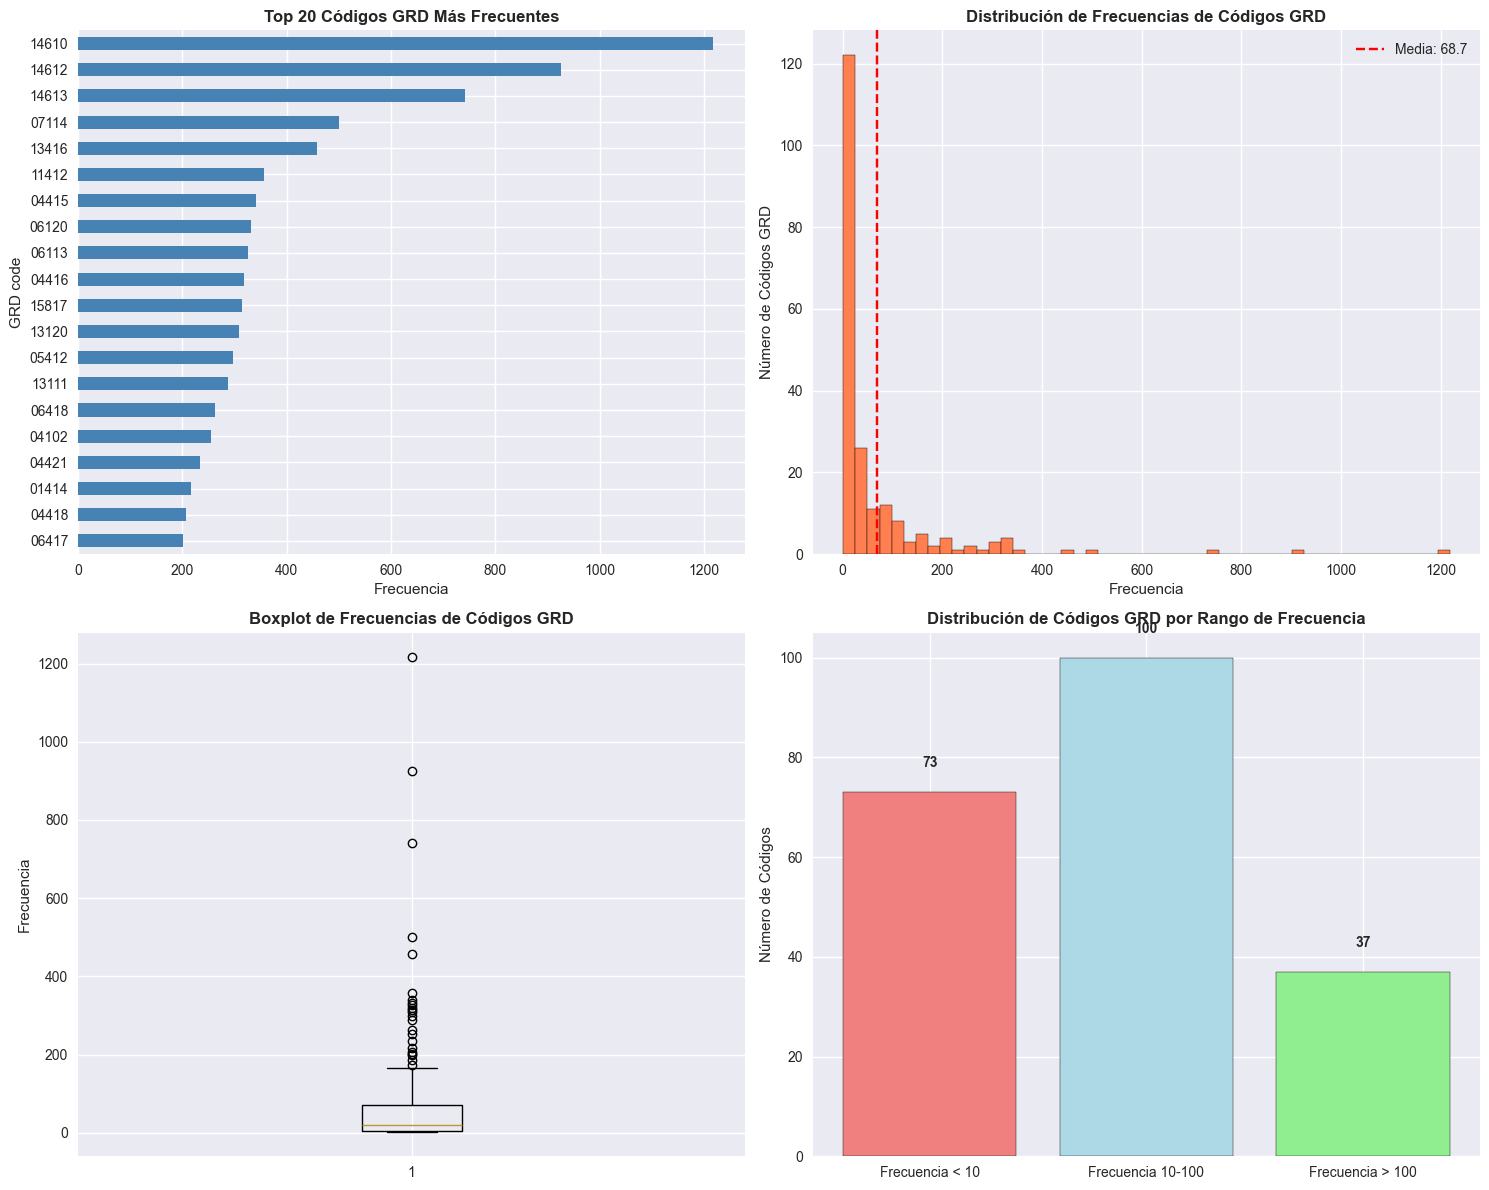


Códigos GRD con frecuencia < 10: 73
Códigos GRD con frecuencia > 100: 37
GRD code
03411    4
19419    4
11411    4
12112    4
13113    4
09411    3
05115    3
04110    3
19418    3
11111    3
18415    3
13101    3
08180    3
05116    2
18413    2
12410    2
01410    2
03130    2
08411    2
05422    2
Name: count, dtype: int64


In [67]:
# Visualización de distribución de GRD codes
import matplotlib.pyplot as plt

# Configurar matplotlib
%matplotlib inline

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Top 20 códigos GRD más frecuentes
grd_counts.head(20).plot(kind='barh', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Top 20 Códigos GRD Más Frecuentes', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Frecuencia')
axes[0, 0].invert_yaxis()

# Gráfico 2: Distribución de frecuencias (histograma)
axes[0, 1].hist(grd_counts.values, bins=50, color='coral', edgecolor='black')
axes[0, 1].set_title('Distribución de Frecuencias de Códigos GRD', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Frecuencia')
axes[0, 1].set_ylabel('Número de Códigos GRD')
axes[0, 1].axvline(grd_counts.mean(), color='red', linestyle='--', label=f'Media: {grd_counts.mean():.1f}')
axes[0, 1].legend()

# Gráfico 3: Boxplot de frecuencias
axes[1, 0].boxplot(grd_counts.values, vert=True)
axes[1, 0].set_title('Boxplot de Frecuencias de Códigos GRD', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frecuencia')

# Gráfico 4: Códigos con frecuencia muy baja vs alta
# Identificar códigos con frecuencia muy baja (< 10) y alta (> 100)
low_freq = (grd_counts < 10).sum()
high_freq = (grd_counts > 100).sum()

very_low_freq = (grd_counts < 5).sum()
medium_freq = len(grd_counts) - low_freq - high_freq

categories = ['Frecuencia < 10', 'Frecuencia 10-100', 'Frecuencia > 100']
counts = [low_freq, medium_freq, high_freq]
colors = ['lightcoral', 'lightblue', 'lightgreen']

axes[1, 1].bar(categories, counts, color=colors, edgecolor='black')
axes[1, 1].set_title('Distribución de Códigos GRD por Rango de Frecuencia', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Número de Códigos')
for i, v in enumerate(counts):
    axes[1, 1].text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()  # Mostrar el gráfico

# Identificar códigos GRD con frecuencia muy baja o muy alta
print(f"\nCódigos GRD con frecuencia < 10: {low_freq}")
print(f"Códigos GRD con frecuencia > 100: {high_freq}")

# print(f"\nCódigos GRD con frecuencia muy baja (posibles outliers o errores):")
print(grd_counts[grd_counts < 5].head(20))

Dada la frecuencia desbalanceada, usaremos agrupación como estrategia de balanceo.

In [57]:
# Iniciamos generación de un modelo de XGBoost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Paso 1: Preparar target (GRD code), usando códigos GRD agrupados para balancear
def preparar_target_balanceado(dataset, grd_counts, umbral_min=5):
    
    # Agrupar códigos con frecuencia muy baja
    grd_raros = grd_counts[grd_counts < umbral_min].index
    dataset['GRD_target'] = dataset['GRD code'].apply(
        lambda x: 'OTROS_GRD' if x in grd_raros else x
    )
    
    # Codificar target
    le_target = LabelEncoder()
    dataset['GRD_target_encoded'] = le_target.fit_transform(dataset['GRD_target'])
    
    print(f"Categorías de GRD: {len(le_target.classes_)}")
    print(f"Distribución:")
    print(dataset['GRD_target'].value_counts().head(10))
    
    return dataset, le_target

# Aplicar preparación
dataset_prep, le_target = preparar_target_balanceado(dataset, grd_counts, umbral_min=5)

Categorías de GRD: 166
Distribución:
GRD_target
14610    1218
14612     925
14613     741
07114     501
13416     458
11412     357
04415     341
06120     332
06113     326
04416     319
Name: count, dtype: int64


In [68]:
# Paso 2: Vectorizar features (diagnósticos, procedimientos, demográficos)
def crear_features_xgboost(dataset):

    # Obtener columnas de diagnósticos y procedimientos (códigos limpios)
    diag_cols = [col for col in dataset.columns if 'Diag' in col and '(code)' in col]
    proced_cols = [col for col in dataset.columns if 'Proced' in col and '(code)' in col]
    
    # Recopilar todos los códigos únicos
    all_diags = set()
    all_proceds = set()
    
    for col in diag_cols:
        all_diags.update(dataset[col].dropna().unique())
    
    for col in proced_cols:
        all_proceds.update(dataset[col].dropna().unique())
    
    print(f"Diagnósticos únicos: {len(all_diags)}")
    print(f"Procedimientos únicos: {len(all_proceds)}")
    
    # Crear features binarias (presencia/ausencia de cada código)
    # Para evitar demasiadas features, usar solo los más frecuentes
    from collections import Counter
    
    # Top diagnósticos y procedimientos
    all_diag_list = []
    all_proced_list = []
    
    for col in diag_cols:
        all_diag_list.extend(dataset[col].dropna().tolist())
    for col in proced_cols:
        all_proced_list.extend(dataset[col].dropna().tolist())
    
    top_diags = [diag for diag, _ in Counter(all_diag_list).most_common(100)]
    top_proceds = [proc for proc, _ in Counter(all_proced_list).most_common(100)]
    
    # Crear matriz de features
    features_list = []
    
    for idx, row in dataset.iterrows():
        feature_dict = {}
        
        # Features de diagnósticos (top 100)
        for diag in top_diags:
            feature_dict[f'diag_{diag}'] = 1 if diag in [row[col] for col in diag_cols] else 0
        
        # Features de procedimientos (top 100)
        for proc in top_proceds:
            feature_dict[f'proced_{proc}'] = 1 if proc in [row[col] for col in proced_cols] else 0
        
        # Features demográficas
        if 'Edad en años' in dataset.columns:
            feature_dict['edad'] = row['Edad en años'] if pd.notna(row['Edad en años']) else 0
        
        if 'Sexo (Desc)' in dataset.columns:
            feature_dict['sexo_hombre'] = 1 if row['Sexo (Desc)'] == 'Hombre' else 0
            feature_dict['sexo_mujer'] = 1 if row['Sexo (Desc)'] == 'Mujer' else 0
        
        # Features agregadas
        num_diags = sum(1 for col in diag_cols if pd.notna(row[col]) and row[col] != '')
        num_proceds = sum(1 for col in proced_cols if pd.notna(row[col]) and row[col] != '')
        
        feature_dict['num_diagnosticos'] = num_diags
        feature_dict['num_procedimientos'] = num_proceds
        
        features_list.append(feature_dict)
    
    X = pd.DataFrame(features_list)
    print(f"Features creadas: {X.shape[1]} columnas")
    
    return X

# Crear features
X = crear_features_xgboost(dataset_prep)
y = dataset_prep['GRD_target_encoded']

Diagnósticos únicos: 3649
Procedimientos únicos: 904
Features creadas: 205 columnas


In [ ]:
# Paso 3: Dividir datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {len(X_train)} muestras")
print(f"Test: {len(X_test)} muestras")
print(f"Clases en train: {len(np.unique(y_train))}")

# Paso 4: Calcular pesos para clases desbalanceadas
from sklearn.utils.class_weight import compute_sample_weight

# # Calcular sample weights, a usar en el modelo
sample_weights = compute_sample_weight('balanced', y_train)

# Calcular manualmente pesos para clases desbalanceadas
class_counts = pd.Series(y_train).value_counts().sort_index()
total_samples = len(y_train)
class_weights = total_samples / (len(class_counts) * class_counts)
sample_weights_manual = y_train.map(class_weights.to_dict())

print(f"\nPesos de clases (primeras 10):")
for i, (clase, peso) in enumerate(zip(class_counts.index[:10], class_weights[:10])):
    print(f"  Clase {clase}: {peso:.2f} (frecuencia: {class_counts.iloc[i]})")

Train: 11533 muestras
Test: 2884 muestras
Clases en train: 166

Pesos de clases (primeras 10):
  Clase 0: 11.58 (frecuencia: 6)
  Clase 1: 2.48 (frecuencia: 28)
  Clase 2: 0.40 (frecuencia: 173)
  Clase 3: 4.09 (frecuencia: 17)
  Clase 4: 17.37 (frecuencia: 4)
  Clase 5: 11.58 (frecuencia: 6)
  Clase 6: 1.10 (frecuencia: 63)
  Clase 7: 3.16 (frecuencia: 22)
  Clase 8: 0.58 (frecuencia: 119)
  Clase 9: 4.96 (frecuencia: 14)


In [73]:
# Paso 5: Configurar y entrenar XGBoost
import sklearn
from sklearn.base import BaseEstimator
import xgboost as xgb

params = {
    'objective': 'multi:softprob',  # Multi-clase con probabilidades
    'num_class': len(np.unique(y)),  # Número de clases
    'eval_metric': 'mlogloss',  # Métrica para multi-clase
    'max_depth': 6,  # Profundidad del árbol
    'learning_rate': 0.1,  # Tasa de aprendizaje
    'subsample': 0.8,  # Submuestreo de filas
    'colsample_bytree': 0.8,  # Submuestreo de columnas
    'min_child_weight': 3,  # Peso mínimo en hojas (importante para desbalance)
    'gamma': 0.1,  # Reducción mínima de pérdida
    'reg_alpha': 0.1,  # Regularización L1
    'reg_lambda': 1.0,  # Regularización L2
    'scale_pos_weight': 1,  # Para clases desbalanceadas (ajustar si es binario)
    'random_state': 42,
    'tree_method': 'hist',  # Método rápido
    'verbosity': 1
}

# Crear modelo. 
model = xgb.XGBClassifier(
    **params,
    n_estimators=200
)


In [74]:
# Entrenar con sample weights
model.fit(
    X_train, y_train,
    sample_weight=sample_weights,  # Usar pesos para balancear
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=20,  # Parar si no mejora
    verbose=True
)

/Users/camilaeyzaguirre/Library/Mobile Documents/com~apple~CloudDocs/Magister/9-Topicos ciencia de datos/proyecto1/env311/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[00:29:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[0]	validation_0-mlogloss:4.57210	validation_1-mlogloss:4.59365
[1]	validation_0-mlogloss:4.11726	validation_1-mlogloss:4.17072
[2]	validation_0-mlogloss:3.78095	validation_1-mlogloss:3.86110
[3]	validation_0-mlogloss:3.53857	validation_1-mlogloss:3.64615
[4]	validation_0-mlogloss:3.33593	validation_1-mlogloss:3.46954
[5]	validation_0-mlogloss:3.16842	validation_1-mlogloss:3.32917
[6]	validation_0-mlogloss:2.98263	validation_1-mlogloss:3.16863
[7]	validation_0-mlogloss:2.84476	validation_1-mlogloss:3.05055
[8]	validation_0-mlogloss:2.71002	validation_1-mlogloss:2.93666
[9]	validation_0-mlogloss:2.59305	validation_1-mlogloss:2.83997
[10]	validation_0-mlogloss:2.48418	validation_1-mlogloss:2.75040
[11]	validation_0-mlogloss:2.37695	validation_1-mlogloss:2.66305
[12]	validation_0-mlogloss:2.28507	valida

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_class=166, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Paso 6: Evaluar modelo
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Accuracy
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")



Accuracy: 0.5922


In [81]:
# Paso 7: Guardar modelo
pathModel = 'modelo/proyecto1_modelo.json'
model.save_model(pathModel)

# A considerar: save_model('modelo.json') no guarda el LabelEncoder, por lo que se debe guardar por separado
pathLabelEncoder = 'modelo/proyecto1_labeleconder.pkl'
import pickle
with open(pathLabelEncoder, 'wb') as f:
    pickle.dump(le_target, f)

print("Modelo guardado en: ", pathModel)
print("LabelEncoder guardado en: ", pathLabelEncoder)


Modelo guardado en:  modelo/proyecto1_modelo.json
LabelEncoder guardado en:  modelo/proyecto1_labeleconder.pkl
